# Load file

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
from tqdm import tqdm
dir = '/content/gdrive/MyDrive/archive'

Mounted at /content/gdrive


article

In [75]:
nRowsRead = None # specify 'None' if want to read whole file
# nyt-articles-2020.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/gdrive/MyDrive/archive/nyt-articles-2020.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'nyt-articles-2020.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 16787 rows and 11 columns


comment

In [3]:
nRowsRead = None # specify 'None' if want to read whole file
# nyt-comments-2020.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv( dir+'/nyt-comments-2020.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'nyt-comments-2020.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')
article = np.array(df1)
comments = np.array(df2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


There are 4986461 rows and 23 columns


# Data cleaning

Article cleaning \\
列数从0开始 \\
第1列 第2列不出现 politics \\
第6列不出现 [] \\
第7列筛选文章词数大于50 \\
第9列筛选comments个数大于50 \\




In [184]:
#只保留sports和movies
# df1_1 = df1.drop(df1[df1['section'] != 'Sports'].index)
# df1_2 = df1.drop(df1[df1['section'] != 'Movies'].index)
# cleaned_arti = pd.concat([df1_1, df1_2])
cleaned_arti = df1
#第六列不出现空
cleaned_arti = cleaned_arti.drop(cleaned_arti[cleaned_arti['keywords'] == '[]'].index)
#第七列筛选次数大于50
cleaned_arti = cleaned_arti.drop(cleaned_arti[cleaned_arti['word_count'] < 50].index)
#第九列comments个数大于50
cleaned_arti = cleaned_arti.drop(cleaned_arti[cleaned_arti['n_comments'] < 50].index)
#取出对应的article id
#article只保留四列
cleaned_arti = cleaned_arti[['headline','abstract','keywords', 'uniqueID']]

In [185]:
cleaned_arti.dropna(axis=0,how='any')

,headline,abstract,keywords,uniqueID
0,Protect Veterans From Fraud,Congress could do much more to protect America...,"['Veterans', 'For-Profit Schools', 'Financial ...",nyt://article/69a7090b-9f36-569e-b5ab-b0ba5bb3...
1,‘It’s Green and Slimy’,Christina Iverson and Jeff Chen ring in the Ne...,['Crossword Puzzles'],nyt://article/9edddb54-0aa3-5835-a833-d311a76f...
5,Pro-Iranian Protesters End Siege of U.S. Embas...,Iran’s ability to deploy militias to attack th...,"['Iraq', 'Iran', 'United States', 'Demonstrati...",nyt://article/ac742403-9ccd-522f-9a1e-a90feb6c...
7,"She Felt Fine, but Her M.R.I. Showed Several S...",After the 67-year-old woman fell at the airpor...,"['Stroke', 'Brain', 'Heart', 'Medicine and Hea...",nyt://article/dfd5bb59-f330-5c01-ae02-221e6f9c...
10,"Eat Better, Feel Better? Food Advice From the ...","Intermittent fasting, drinking less alcohol an...","['Weight', 'Fasting', 'Diet and Nutrition']",nyt://article/da74e3b3-f027-5b03-9052-0bc2e69a...
...,...,...,...,...
16781,Here’s Why Distribution of the Vaccine Is Taki...,Health officials and hospitals are struggling ...,"['Vaccination and Immunization', 'Coronavirus ...",nyt://article/5320a2e9-d739-542a-a397-443c4323...
16782,What It Takes to Heal From Covid-19,"Survivors can get better, but they need help.","['Chronic Condition (Health)', 'Coronavirus (2...",nyt://article/e8adbb75-a8b3-5a8c-886b-b9c1195f...
16784,"Their Finances Ravaged, Customers Fear Banks W...",Banks have the power to decide whether to let ...,"['Banking and Financial Institutions', 'Corona...",nyt://article/c4b9edab-bdde-5d81-b496-06fedb52...
16785,Should Wine Be Among Your Health Resolutions?,The new category of ‘clean wines’ is an effort...,"['Wines', 'Grapes', 'Diet and Nutrition', 'Dia...",nyt://article/efcaf652-ffad-5b4e-9f17-4fd9aff5...


In [186]:
kw_set = np.array(cleaned_arti['keywords'])

In [187]:
keep_idx = []
for i, kw in enumerate(kw_set):
    if str(kw)=='nan' or ',' not in kw or len(kw.split(',')) < 25:
        pass
    else:
        keep_idx.append(i)

In [188]:
cleaned_arti = cleaned_arti.iloc[keep_idx, :]

In [189]:
len(cleaned_arti)

106

Comments cleaning \\
根据cleaned article筛选comments \\


In [190]:
uni_id = cleaned_arti['uniqueID'].to_numpy()
cleaned_comm = df2[df2['articleID'].isin(uni_id)]
cleaned_comm = cleaned_comm[['commentBody','articleID']]

In [191]:
comment_len_list = []
a = np.array(cleaned_comm['commentBody'])
for comm in tqdm(a):
    comment_len_list.append(len(comm.split(' ')))
comment_len_list = np.array(comment_len_list)

100%|██████████| 59296/59296 [00:00<00:00, 250005.48it/s]


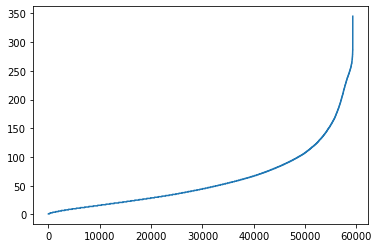

In [192]:
plt.plot(np.sort(comment_len_list))

In [193]:
np.mean(comment_len_list)

60.84363194819212

# Node extraction

reconstruct keywords

In [194]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 


# new version
def extract_kw(cleaned_arti):
    # stop words in English
    stop = set(stopwords.words('english')) 
    #extract keywords from cleaned article
    kw_set = np.array(cleaned_arti['keywords'])
    
    for i, kw in enumerate(kw_set):
        if ',' not in kw:
            print(len(kw))
        kw = kw.split(',') if ',' in kw else kw
        for j in range(len(kw)):
            kw[j] = re.sub(u"([^\u0041-\u005a\u0061-\u007a\u0020])", "", kw[j])
            kw[j] = kw[j].strip()
        kw = np.array([i for i in kw if i != "" and i not in stop])
        kw_set[i] = np.unique(kw)
    return kw_set


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [195]:
!pip install transformers
import torch
from transformers import BertTokenizer, BertModel
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
model = BertModel.from_pretrained("bert-base-uncased").to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [196]:
kw = extract_kw(cleaned_arti)

In [197]:
import string 

def not_break(sen):
    return (sen != '\n' and sen != '\u3000' and  sen != '' and not sen.isspace())
def filter_data(ini_data):
    new_data = list(filter(not_break, [data.strip() for data in ini_data]))
    return new_data

In [214]:
# 略加修改
import gc
kw = extract_kw(cleaned_arti)
for i in range(len(kw)):
    kw[i] = kw[i].astype('<U5000')

headline = np.array(cleaned_arti['headline'])
def recon_kw(kw, headline, cleaned_arti, cleaned_comm):
    data_list = []
    sample_num = 10
    sample_comment_set = []
    sample_comment_set_atten_mask = []
    edge_connection_box, edge_feat_box = [], []

    #divider
    english_punctuation = string.punctuation
    eng_punc = '|'.join([c for c in english_punctuation])
    eng_punc  = eng_punc[:-5] + eng_punc[-3:]

    uni_id = np.array(cleaned_arti['uniqueID'])

    #construct abstract set
    abstract_set = np.array(cleaned_arti['abstract'])

    #iterate through each article
    for i, id in enumerate(tqdm(uni_id)):

        #find corresponding comments set
        idx = np.where(np.array(cleaned_comm['articleID']) == id)
        comment_set = np.array(cleaned_comm['commentBody'])[idx]

        #constract abstract in sentence for one id
        abstract = abstract_set[i]
        abstract_kw = filter_data(re.split(r''+("["+eng_punc+"]"), abstract))
        abstract_kw = [abstract.strip('\n') for abstract in abstract_kw]
        
        #iterate through each comment, construct comment set
        comm_list = []
        comm_kw = []
        for comm in comment_set:
            comm_k = re.sub(u"([^\u0061-\u007a\u0030-\u0039\u0020\u0041-\u005a])", "", comm.strip('\n'))
            comm1 = comm_k.split(' ')
            comm_list.extend(comm1)
            comm_k = comm.strip('\n')
            comm_kw.append(comm_k)
        
        #construct dict
        comm_dict = {}
        for comm in comm_list:
            if comm in comm_dict:
                comm_dict[comm] += 1
            else:
                comm_dict[comm] = 1
        
        # take out the top10
        top = 10
        freq_threshold = 10
        stop_words = 50

        # rank comm_dict
        comm_dict = np.array(sorted(comm_dict.items(), key=lambda item:item[1], reverse=True))[stop_words:]
        comm_kw_list = np.array(comm_dict[:, 0])
        freq_list = np.array(np.array(comm_dict[:, 1], dtype=np.int64))

        # append keywords
        #************************************************************************************
        # delete stop words
        idx = np.where(freq_list >= freq_threshold)[0]
        kw[i] = np.concatenate((kw[i], comm_kw_list[idx])) if len(idx) <= top else np.concatenate((kw[i], comm_kw_list[:top]))
        kw[i] = np.unique(kw[i])

        # append headline at the end of each graph
        headline[i] = headline[i].strip('\n')
        headline[i] =  np.delete(headline[i], np.where(headline[i] == ''))
        kw[i] = np.concatenate((kw[i], headline[i]))


        #add our keyword to tokenizer
        for word in kw[i]:
            tokenizer.add_tokens([word])

        #resize BERTmodel
        model.resize_token_embeddings(len(tokenizer))


        # copy kw, without the first empty node
        kw_copy = kw[i].copy()


        #sample several comments as target
        random_idx = np.arange(len(comm_kw))
        np.random.shuffle(random_idx)
        sample_idx = random_idx[:sample_num]
        sample_max_length = 50
        sample_comment = np.zeros((sample_num, sample_max_length))
        sample_comment_mask = np.zeros((sample_num, sample_max_length))
        for idx in range(len(sample_idx)):
            selected_comm = comm_kw[idx]
            sample_encoding = tokenizer.encode_plus(selected_comm, padding='max_length',add_special_tokens=True, max_length=sample_max_length, truncation=True, return_attention_mask=True)
            sample_comment[idx] = sample_encoding['input_ids']
            sample_comment_mask[idx] = sample_encoding['attention_mask']
            del comm_kw[idx]
            gc.collect()
        sample_comment_set.append(sample_comment)
        sample_comment_set_atten_mask.append(sample_comment_mask)

        # add comment and abstract to node
        comm_kw.extend(abstract_kw)
        docs = comm_kw

        counter = np.zeros(len(docs))
        counter_edge = np.zeros((len(kw_copy[:-1]), len(docs)))
        
        # add corresponding sentences to keywords
        #************************************************************************************
        for j, single_kw in enumerate(kw_copy[:-1]):
            # convert to word
            single_kw_set = re.sub(u"([^\u0061-\u007a\u0020])", "", single_kw.strip('\n').lower()).split(' ')
            for k, doc in enumerate(docs):  
                doc_copy = re.sub(u"([^\u0061-\u007a\u0020])", "", doc.strip('\n').lower())
                exist = 0
                for s_kw in single_kw_set:
                    if s_kw in doc_copy.split(' ') and exist == 0:
                        exist = 1
                        kw[i][j] += ' '
                        kw[i][j] = np.char.add(kw[i][j], doc)
                        counter[k] += 1
                        counter_edge[j, k] += 1
                    else:
                        pass
        #************************************************************************************



        # construct empty node 
        empty_node = np.array([''], dtype='<U10000')
        kw[i] = np.concatenate((empty_node, kw[i]))
        
        # add doc to empty node
        if len(np.where(counter == 0)[0]) != 0:
            empty_doc = np.array(docs)[np.where(counter == 0)[0]]
            kw[i][0] = np.char.add(kw[i][0], ' '.join(empty_doc))

        #encode and generate graph.x data file
        path = '/content/gdrive/MyDrive/graph/graph_{0:}'.format(i)
        if not os.path.exists(path):
            os.makedirs(path)

        # for ith, row in enumerate(kw[i]):
        #     input = tokenizer.encode_plus(row, padding='max_length',add_special_tokens=True, max_length=200, truncation=True, return_attention_mask=True, return_tensors = "pt").to(device)
        #     torch.save(model(**input)[0][0][1], path + "/node{0:}.pt".format(ith))

        for ith, row in enumerate(kw[i]):
            input = tokenizer.encode_plus(row, add_special_tokens=True, max_length=512, return_attention_mask=True, truncation=True, return_tensors = "pt").to(device)
            with torch.no_grad():
                output = model(**input)[0][0][1]
                output = output.cpu()
            torch.save(output, path + "/node{0:}.pt".format(ith))
            

        # calculate edge
        store_edge = []
        value_edge = []

        for j in range(len(counter_edge)-1):
            interaction = np.sum(counter_edge[j] * counter_edge[j+1:], axis=1)
            if len(np.where(interaction != 0)[0]) != 0:
                if len(value_edge) != 0:
                    value_edge.append(np.hstack((value_edge[-1], interaction[np.nonzero(interaction)])))
                else:
                    value_edge.append(interaction[np.nonzero(interaction)])
                
                edge = np.vstack((np.array([j for _ in range(len(np.where(interaction != 0)[0]))]), np.where(interaction != 0)[0]+j+1))
                
                if len(store_edge) != 0:
                    store_edge.append(np.hstack((store_edge[-1], edge))) 
                else:
                    store_edge.append(edge)

        # edge connection
        if len(store_edge) == 0:
            pass
        else:
            edge_for_id = store_edge[-1]
        
            # copy edge connection
            edge_for_id2 = np.zeros_like(edge_for_id)
            edge_for_id2[0], edge_for_id2[1] = edge_for_id[1], edge_for_id[0]
            edge_connection_box.append(np.hstack((edge_for_id, edge_for_id2)))

            # edge feature
            edge_feat_for_id = value_edge[-1]

            # copy edge feature
            edge_feat_box.append(np.hstack((edge_feat_for_id, edge_feat_for_id)))
        
    return sample_comment_set, sample_comment_set_atten_mask, edge_connection_box, edge_feat_box


In [216]:
sample_comment_set, sample_comment_set_atten_mask, edge_connection, edge_feat = recon_kw(kw, np.array(cleaned_arti['headline']), cleaned_arti, cleaned_comm)

100%|██████████| 106/106 [09:52<00:00,  5.59s/it]


In [217]:
#generate the other edge related data file 
import os

path = '/content/gdrive/MyDrive/edge_connection'
if not os.path.exists(path):
    os.makedirs(path)

path = '/content/gdrive/MyDrive/edge_feat'
if not os.path.exists(path):
    os.makedirs(path)

path = '/content/gdrive/MyDrive/sample_comment'
if not os.path.exists(path):
    os.makedirs(path)

path = '/content/gdrive/MyDrive/sample_comment_set_atten_mask'
if not os.path.exists(path):
    os.makedirs(path)


for i in range(len(uni_id)):
    np.save('/content/gdrive/MyDrive/edge_connection/egde_connection{0:}.npy'.format(i), edge_connection[i])
    np.save('/content/gdrive/MyDrive/edge_feat/edge_feat{0:}.npy'.format(i), edge_feat[i])
    np.save('/content/gdrive/MyDrive/sample_comment/sample_comment{0:}.npy'.format(i), sample_comment_set[i])
    np.save('/content/gdrive/MyDrive/sample_comment_set_atten_mask/sample_comment_set_atten_mask{0:}.npy'.format(i), sample_comment_set_atten_mask[i])





In [228]:
save_directory_tokenizer = '/content/gdrive/MyDrive/tokenizer'
tokenizer.save_pretrained(save_directory_tokenizer)

save_directory_BERT = '/content/gdrive/MyDrive/BERT'
model.save_pretrained(save_directory_BERT)

save_directory_BERT_weight = '/content/gdrive/MyDrive/BERT_weight'
torch.save(model.embeddings.word_embeddings.weight.detach().cpu(), save_directory_BERT_weight+'.pt')

# Graph construction

In [ ]:
!export CPATH=/usr/local/cuda/include:$CPATH
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.10.0+cu111.html
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from google.colab import drive
from tqdm import tqdm
drive.mount('/content/gdrive')
import os
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install transformers
from transformers import BertTokenizer, BertModel

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

save_directory_tokenizer='/content/gdrive/MyDrive/tokenizer'
tokenizer = BertTokenizer.from_pretrained(save_directory_tokenizer)

save_directory_BERT = '/content/gdrive/MyDrive/BERT'
model = BertModel.from_pretrained(save_directory_BERT).to(device)

save_directory_BERT_weight = '/content/gdrive/MyDrive/BERT_weight.pt'
model_weight = torch.load(save_directory_BERT_weight)

In [5]:
import os.path as osp

import torch
from torch_geometric.data import Dataset, download_url


class MyOwnDataset(Dataset):
    def __init__(self, root, transform=None, pre_transform=None, pre_filter=None):
        super().__init__(root, transform, pre_transform, pre_filter)

    @property
    def raw_file_names(self):
        return ['/graph']

    @property
    def processed_file_names(self):
        path_graph = '/content/gdrive/MyDrive/graph'
        num_file = len(os.listdir(path_graph))
        return ['data_' + str(i) for i in range(num_file)]

    def download(self):
        pass

    def process(self):
        path_graph = '/content/gdrive/MyDrive/graph'
        path_connect = '/content/gdrive/MyDrive/edge_connection'
        path_feat = '/content/gdrive/MyDrive/edge_feat'
        num_file = len(os.listdir(path_graph))

        idx=0
        for i in tqdm(range(num_file)):
            path_graphi = path_graph+'/graph_'+str(i)
            path_connecti = path_connect+'/egde_connection'+str(i)+'.npy'
            path_feati = path_feat+'/edge_feat'+str(i)+'.npy'
            num_node = len(os.listdir(path_graphi))
            
            #load
            x = torch.zeros(num_node, 768)
            for j in range(num_node):
                x[j] = torch.load(path_graphi+'/node{0:}.pt'.format(j))
            
            edge_index = torch.tensor(np.load(path_connecti), dtype=torch.long)
            edge_attr = torch.tensor(np.load(path_feati))

            data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr)
            torch.save(data, osp.join(self.processed_dir, f'data_{idx}.pt'))
            idx += 1

    def len(self):
        return len(self.processed_file_names)

    def get(self, idx):
        data = torch.load(osp.join(self.processed_dir, f'data_{idx}.pt'))
        return data

In [6]:
def gen_y(sample_comment, sample_comment_atten_mask):
    #generate y data file 
    sample_comment = np.array(sample_comment)
    sample_comment_atten_mask = np.array(sample_comment_atten_mask)
    num_label_set = sample_comment.shape[1]
    for i in tqdm(range(num_label_set)):
        label_set = sample_comment[:, i, :]
        label_set_atten_mask = sample_comment_atten_mask[:, i, :]
        num_label = label_set.shape[0]
        
        #vector y path
        path = '/content/gdrive/MyDrive/label_set{0:}'.format(i)
        if not os.path.exists(path):
            os.makedirs(path)

        #scalar y path
        path_scalar = '/content/gdrive/MyDrive/scalar_label_set{0:}'.format(i)
        if not os.path.exists(path_scalar):
            os.makedirs(path_scalar)

        for j in range(num_label):
            label_tensor = torch.tensor(label_set[j], dtype=torch.long).view(1,-1).to(device)
            label_mask_tensor = torch.tensor(label_set_atten_mask[j], dtype=torch.long).view(1,-1).to(device)
            with torch.no_grad():
                label_tensor_vector = model(label_tensor, label_mask_tensor)[0][0]
                label_tensor_vector = label_tensor_vector.cpu()
            label_tensor = label_tensor.cpu()
            torch.save(label_tensor_vector, path + "/label{0:}.pt".format(j))
            torch.save(label_tensor, path_scalar+"/label{0:}.pt".format(j))


In [7]:
class YDataset(torch.utils.data.Dataset):
    def __init__(self, path, num_set):
        super(YDataset, self).__init__()
        self.path = path 
        self.num_set = num_set

    def __getitem__(self, index):
        path = self.path + str(self.num_set) + '/label' + str(index) + '.pt'
        data = torch.load(path).cpu()
        return data

    def __len__(self):
        return len(os.listdir(self.path+str(self.num_set)))

In [8]:
class MyDataset(Dataset):
    def __init__(self, datasetA, datasetB, datasetC):
        self.datasetA = datasetA
        self.datasetB = datasetB
        self.datasetC = datasetC
        
    def __getitem__(self, index):
        xA = self.datasetA[index]
        xB = self.datasetB[index]
        xC = self.datasetC[index]
        return xA, xB, xC
    
    def __len__(self):
        return len(self.datasetA)
    

In [9]:
#generate y data file
path = '/content/gdrive/MyDrive/label_set0'
if not os.path.exists(path):
    path = '/content/gdrive/MyDrive/graph/' 
    files = os.listdir(path)   
    num_file = len(files)       

    #graph.x file has been generated by recon_kw
    #generate sample
    sample_comment = []
    sample_comment_atten_mask = []

    for i in tqdm(range(num_file)):
        sample_comment.append(np.load('/content/gdrive/MyDrive/sample_comment/sample_comment{0:}.npy'.format(i)))
        sample_comment_atten_mask.append(np.load('/content/gdrive/MyDrive/sample_comment_set_atten_mask/sample_comment_set_atten_mask{0:}.npy'.format(i)))
    gen_y(sample_comment, sample_comment_atten_mask)

100%|██████████| 10/10 [00:15<00:00,  1.54s/it]


# GCN with fixed pretrained embedding

In [ ]:
# 1. lower batchsize
# 2. shuffle # 4. lower hidden size
# 3. lr
# 5. align two dataset
# 6. stop when comments aren't continuing, [padding] 2
# 7. better decoding
# 8. take the avg length of comments 1

In [62]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch_geometric.nn import GATConv, GraphNorm

class GraphEncoder(torch.nn.Module):
    def __init__(self, embedding_size):
        super(GraphEncoder, self).__init__()
        self.embedding_size = embedding_size        
        self.hidden_size = 128
        #GCN encoder
        self.conv1 = GATConv(self.embedding_size, self.hidden_size, edge_dim=1)
        self.norm = GraphNorm(self.hidden_size)
        self.conv2 = GATConv(self.hidden_size, self.hidden_size, edge_dim=1)
        self.fc = nn.Linear(self.hidden_size, self.hidden_size) ########big fc!!

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
    
        ## 1. GCN
        x_ = self.conv1(x, edge_index, edge_attr.to(torch.float))
        x_ = self.norm(x_)
        x_ = F.relu(x_)
        x_ = x_.to(torch.float32)
        x_ = self.conv2(x_, edge_index, edge_attr.to(torch.float))
        x_ = self.norm(x_)
        x_ = x_.to(torch.float32)
        x_ = torch.tanh(self.fc(x_)) #num_nodes, embedding_size --> num_nodes, encoder_hidden_size


        return x_


class BahdanauAttention(nn.Module):
    def __init__(self, units, hidden_size):
        super(BahdanauAttention, self).__init__()
        self.W1 = nn.Linear(hidden_size, units)
        self.W2 = nn.Linear(hidden_size, units)
        self.V = nn.Linear(units, 1)
        self.tanh = nn.Tanh()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, batch_size, query, values):
        #query: init_hidden_state: headline embedding: 1, embedding_size
        #values: encoder_output_embeeding: 1, bs, embedding_size
        query = query.view(batch_size, 1, -1) # bs, 1, embedding_size
        score = self.V(self.tanh(self.W1(values) + self.W2(query))) #bs, num_nodes, attention_hidden_size -> bs, num_nodes, 1
        attention_weights = self.softmax(score) #bs, num_nodes, 1
        context_vector = torch.sum(attention_weights * values, 1) #bs, embedding_size == bs, encoder_hidden_size

        return context_vector, attention_weights


class GRUDecoder(nn.Module):
    def __init__(self, vocab_size, embedding_size, embedding_weight, dec_units, encoder_hidden_size):
        super(GRUDecoder, self).__init__()
        #GRU Decoder
        self.dec_units = dec_units
        self.vocab_size = vocab_size
        self.encoder_hidden_size = encoder_hidden_size
        self.embedding_size = embedding_size

        self.gru = nn.GRU(
            input_size=self.encoder_hidden_size,
            hidden_size=self.dec_units
        )
        self.fc_input = nn.Linear(768, self.embedding_size)
        self.fc = nn.Linear(self.dec_units, 768)
        self.embedding = nn.Linear(768, vocab_size, bias=False)
        with torch.no_grad():
            self.embedding.weight.copy_(embedding_weight)
        self.attention = BahdanauAttention(self.dec_units, self.encoder_hidden_size)
        self.attn_combine = nn.Linear(self.embedding_size + self.encoder_hidden_size, self.dec_units)
        self.relu = nn.ReLU()

    def forward(self, batch_size, x, hidden, enc_output):
        #x: bs, bs, encoder_hidden_size
        #hidden: 1, bs, encoder_hidden_size
        #enc_output: num_nodes, bs, encoder_hidden_size
        #output -> embedding
        x = self.fc_input(x).view(1, batch_size, -1) #1, bs, embedding_size

        hidden = hidden.view(1, batch_size, -1) # 1, bs, encoder_hidden_size

        context_vector, attention_weights = self.attention(batch_size, hidden, enc_output) #1, encoder_hidden_size

        context_vector = context_vector.unsqueeze(0) # 1, bs, encoder_hidden_size

        #concatenate x and context_vector
        x = torch.cat((context_vector, x), -1) #1, bs, embedding_size + encoder_hidden_size

        x = self.relu(self.attn_combine(x)) #1, bs, dec_units

        #pass to GRU
        output, hn = self.gru(x, hidden)

        #classification
        output = self.fc(output[0]) #bs, vocab_size

        output = self.embedding(output)

        output = F.log_softmax(output, dim=1) #1, vocab_size

        return output, hn 
    



In [13]:
def get_max_num_nodes(path, num_file):
    len_list = []
    for i in range(num_file):
        len_list.append(len(os.listdir(path+'/graph_'+str(i))))
    return max(len_list)


In [14]:
path = '/content/gdrive/MyDrive/graph/' 
files = os.listdir(path)   
num_file = len(files)  

num_sample = 10

max_num_nodes = get_max_num_nodes('/content/gdrive/MyDrive/graph', num_file)
batchsize = 8

#graph dataset
graph_dataset = MyOwnDataset('/content/gdrive/MyDrive')
# graph_loader = DataLoader(graph_dataset, batchsize, shuffle=False)

#vector y dataloader
path_y_vector = '/content/gdrive/MyDrive/label_set'

#scalar y dataloader
path_y_scalar = '/content/gdrive/MyDrive/scalar_label_set'

datasetA = graph_dataset
datasetB_list = [YDataset(path_y_vector, i) for i in range(num_sample)]
datasetC_list = [YDataset(path_y_scalar, i) for i in range(num_sample)]
dataset_list = [MyDataset(datasetA, datasetB_list[i], datasetC_list[i]) for i in range(num_sample)]

Processing...
100%|██████████| 106/106 [00:04<00:00, 25.61it/s]
Done!


In [ ]:
# from torch_geometric.loader import DataLoader
# #training
# embedding_size = 128
# dec_units = 128
# encoder_hidden_size = 128
# vocab_size = len(tokenizer)
# lr = 5e-4
# num_sample = 10
# epochs = 3000

# graph_encoder = torch.load('/content/gdrive/MyDrive/single_graph_encoder_epoch3400.pt',map_location=device)
# GRU_decoder = torch.load('/content/gdrive/MyDrive/single_GRU_decoder_epoch3400.pt',map_location=device)

# encoder_optimizer = optim.Adam(graph_encoder.parameters(), lr=lr)
# decoder_optimizer = optim.Adam(GRU_decoder.parameters(), lr=lr)

# encoder_optimizer.load_state_dict(torch.load('/content/gdrive/MyDrive/single_encoder_optimizer_epoch3400.pth',map_location=device))
# decoder_optimizer.load_state_dict(torch.load('/content/gdrive/MyDrive/single_decoder_optimizer_epoch3400.pth',map_location=device))

In [ ]:
!pip install wandb
!wandb login

In [59]:
import wandb

wandb.init(project="NLP-project", entity="congliu")

loss,█▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,5.54592


In [60]:
wandb.config = {
  "learning_rate": 1e-4,
  "epochs": 2000,
  "batch_size": 8,
  "encoder_hidden_size": 128,
  "decoder_hidden_size": 128,
  "embedding_size": 128,
  "num_sample": 10,
  "vocab_size": len(tokenizer)
}

In [ ]:
from torch_geometric.loader import DataLoader
#training
embedding_size = 128
dec_units = 128
encoder_hidden_size = 128
vocab_size = len(tokenizer)
lr = 1e-4
num_sample = 10
epochs = 2000

model_weight = model_weight.T.to(device)
# # ##model
graph_encoder = GraphEncoder(768).to(device)
GRU_decoder = GRUDecoder(vocab_size, embedding_size, model_weight.T.to(device), dec_units, encoder_hidden_size).to(device)

# #loss definition
weight = torch.ones(vocab_size).to(device)
weight[0] = 0
weight[100] = 0
criterion = nn.CrossEntropyLoss(weight=weight)

# #optimizer
encoder_optimizer = optim.Adam(graph_encoder.parameters(), lr=lr)
decoder_optimizer = optim.Adam(GRU_decoder.parameters(), lr=lr)

loader = DataLoader(dataset_list[0], batch_size=8, shuffle=True, pin_memory=True, num_workers=2, prefetch_factor=2)

for epoch in range(epochs):
    running_loss = 0.0
    progress_bar = tqdm(loader)
    for j, (data, y, scalar_y) in enumerate(progress_bar):
        progress_bar.set_description('Epoch ' + str(epoch))
        batchsize = y.shape[0]
        loss = 0

        data = data.to(device)
        y = y.to(device).transpose(0, 1) #200, bs, 768
        scalar_y = torch.squeeze(scalar_y.to(device)).transpose(0, 1)

        encoder_optimizer.zero_grad()
        decoder_optimizer.zero_grad()
        
        #encoder
        x_encode = graph_encoder(data) # bs*num_nodes, encoder_hidden_size

        #grasp corresponding x and generate decoder hidden
        encoder_outputs = torch.zeros(batchsize, max_num_nodes, graph_encoder.hidden_size).to(device)
        decoder_hidden = torch.zeros(batchsize, 1, graph_encoder.hidden_size).to(device)
        idx = data.batch.cpu().numpy()
        start_idx = 0
        for batch_num in range(batchsize):
            idx_list = np.where(idx==batch_num)[0]
            graph_data = x_encode[idx_list]
            encoder_outputs[batch_num, :len(idx_list)] = graph_data
            #find headline vertex 
            decoder_hidden[batch_num] = graph_data[-2].view(1, -1)
        encoder_outputs.transpose(0, 1) #max_num_nodes, bs, encoder_hidden_size
        decoder_hidden.transpose(0, 1) # 1, bs, encoder_hidden_size

        dec_input = torch.squeeze(model(torch.tensor([101]).to(device).view(1, -1))[0])
        dec_input = dec_input.repeat(batchsize).view(batchsize, -1)
        #teacher forcing
        correct = 0
        for t in range(y.shape[0]-1):
            # dec_input = y[t] #
            predictions, decoder_hidden = GRU_decoder(batchsize, dec_input, decoder_hidden, encoder_outputs)
            pred_token = torch.argmax(predictions, 1)
            correct += sum(pred_token == scalar_y[t+1]).item()
            loss += criterion(predictions, scalar_y[t+1])
            dec_input = y[t+1]
        
        acc = correct/batchsize/y.shape[0]

        loss.backward()
        encoder_optimizer.step()
        decoder_optimizer.step()

        running_loss += loss.item()/y.shape[0]

        progress_bar.set_postfix(loss='%.3f' % (running_loss /(j+1)),
                                    acc='%.3f' % (acc))
            
    wandb.log({"loss": running_loss /(j+1)})
    # Optional
    wandb.watch(model)

    if epoch % 100 == 99:
        torch.save(graph_encoder, '/content/gdrive/MyDrive/single_graph_encoder_epoch{0:}.pt'.format(epoch+1))
        torch.save(GRU_decoder, '/content/gdrive/MyDrive/single_GRU_decoder_epoch{0:}.pt'.format(epoch+1))
        torch.save(encoder_optimizer.state_dict(),  '/content/gdrive/MyDrive/single_encoder_optimizer_epoch{0:}.pth'.format(epoch+1))
        torch.save(decoder_optimizer.state_dict(),  '/content/gdrive/MyDrive/single_decoder_optimizer_epoch{0:}.pth'.format(epoch+1))


        

Epoch 521:  21%|██▏       | 3/14 [00:02<00:07,  1.53it/s, acc=0.070, loss=5.360]

#beam search

In [ ]:
from math import log
def beam_search_decoder(predictions, k):
    # create the list of [seq, score]
    # score is log_prob
    sequences = [[list(), 1.0]]
    # walk over each step in sequence
    for row in predictions:
        all_candidates = list()
        # expand each current candidate
        for i in range(len(sequences)):
            seq, score = sequences[i]
            for j in range(len(row)):
                # add the embedding into the list and calculate the log_prob
                # 这里可以加if语句去判断是否遇到了end 直接跳过。（如果这样可以迫使模型生成1句话或者2句话，或者你前面如果
                # 加了对于pad的惩罚 这里就不用在多搞了，如果没有可以判断，如果一个pad后面加的还是pad那么说明句子到头了
                candidate = [seq + [j], score * -log(row[j])]
                all_candidates.append(candidate)
        # order all candidates by score
        ordered = sorted(all_candidates, key=lambda tup :tup[1])
        # select k best
        sequences = ordered[:k]
    return sequences

#TopK

In [ ]:
x_encode, weight = graph_encoder(data, mask)
dec_input = torch.tensor([101], device=device)
dec_hidden = x_encode[-1]
decode = []
idx_list = []
for _ in range(200):
    predictions, dec_hidden = GRU_decoder(dec_input, dec_hidden, x_encode, weight)
    a, idx = predictions.topk(2)
    idx_list.append(idx.cpu().numpy()[0,1])
    dec_input = idx[0, 1]
decode = tokenizer.decode(np.array(idx_list))


In [ ]:
decode

"- said i was also a packers put fan - was root qb to the vikings their brett. as [PAD] i was also a packers. i'sean a packers payton was theiring qb to. as [PAD] i was also a packers. i'sean a packers payton was theiring qb to. as [PAD] i was also a packers. i'sean a packers payton was theiring qb to. as [PAD] i was also a packers. i'sean a packers payton was theiring qb to. as [PAD] i was also a packers. i'sean a packers payton was theiring qb to. as [PAD] i was also a packers. i'sean a packers payton was theiring qb to. as [PAD] i was also a packers. i'sean a packers payton was theiring qb to. as [PAD] i was also a packers. i'sean a packers payton was theiring qb to. as [PAD] i was also a packers. i'sean a packers payton was theiring qb to. as"

In [ ]:
for num in sample:
    res = tokenizer.decode(num)
    print(res)

[CLS] i was shocked that the vikings held on. i was even more shocked that new england was not only a wild card contender but ac tua lly lost in the end. i guess the only that that could surprise me more would be if my beloved packers ac tua lly beat seattle and if minn esota made it to the super bowl. what a wild and crazy nfl season thus far. while the 49ers and seahawks are tough and consistent, i stopped assuming any one team will be in the super bowl this year. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [

# LSTM example

In [ ]:
# A sample LSTM text generator

import torch
import pandas as pd
from collections import Counter

import torch
import pandas as pd
from collections import Counter


class Dataset(torch.utils.data.Dataset):
    def __init__(
        self, text_df
    ):
        self.text_df = text_df
        self.words = self.load_words()
        self.uniq_words = self.get_uniq_words()
        self.sequence_length = 4

        self.index_to_word = {index: word for index, word in enumerate(self.uniq_words)}
        self.word_to_index = {word: index for index, word in enumerate(self.uniq_words)}

        self.words_indexes = [self.word_to_index[w] for w in self.words]

    # here I load all the words in all nodes for one graph, it should be fixed...
    def load_words(self):
        text_arr = np.array(self.text_df)
        text = ""
        for i in range(len(text_arr)):
            text += text_arr[i][0] + " "
        return text.split(' ')

    def get_uniq_words(self):
        word_counts = Counter(self.words)
        return sorted(word_counts, key=word_counts.get, reverse=True)

    def __len__(self):
        return len(self.words_indexes) - self.sequence_length

    def __getitem__(self, index):
        return (
            torch.tensor(self.words_indexes[index:index+self.sequence_length]),
            torch.tensor(self.words_indexes[index+1:index+self.sequence_length+1]),
        )

import torch
from torch import nn

# LSTM
class Model(nn.Module):
    def __init__(self, dataset):
        super(Model, self).__init__()
        self.lstm_size = 128
        self.embedding_dim = 128
        self.num_layers = 3

        n_vocab = len(dataset.uniq_words)
        self.embedding = nn.Embedding(
            num_embeddings=n_vocab,
            embedding_dim=self.embedding_dim,
        )
        self.lstm = nn.LSTM(
            input_size=self.lstm_size,
            hidden_size=self.lstm_size,
            num_layers=self.num_layers,
            dropout=0.2,
        )
        self.fc = nn.Linear(self.lstm_size, n_vocab)

    def forward(self, x, prev_state):
        embed = self.embedding(x)
        output, state = self.lstm(embed, prev_state)
        logits = self.fc(output)

        return logits, state

    def init_state(self, sequence_length):
        return (torch.zeros(self.num_layers, sequence_length, self.lstm_size),
                torch.zeros(self.num_layers, sequence_length, self.lstm_size))
        
import argparse
import torch
import numpy as np
from torch import nn, optim
from torch.utils.data import DataLoader

def train(dataset, model):
    model.train()

    dataloader = DataLoader(
        dataset,
        batch_size=256
    )

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(10):
        state_h, state_c = model.init_state(4)

        for batch, (x, y) in enumerate(dataloader):

            optimizer.zero_grad()

            y_pred, (state_h, state_c) = model(x, (state_h, state_c))
            loss = criterion(y_pred.transpose(1, 2), y)

            state_h = state_h.detach()
            state_c = state_c.detach()

            loss.backward()
            optimizer.step()

            print({ 'epoch': epoch, 'batch': batch, 'loss': loss.item() })

def predict(dataset, model, text, next_words=100):
    words = text.split(' ')
    model.eval()

    state_h, state_c = model.init_state(len(words))

    for i in range(0, next_words):
        x = torch.tensor([[dataset.word_to_index[w] for w in words[i:]]])
        y_pred, (state_h, state_c) = model(x, (state_h, state_c))

        last_word_logits = y_pred[0][-1]
        p = torch.nn.functional.softmax(last_word_logits, dim=0).detach().numpy()
        word_index = np.random.choice(len(last_word_logits), p=p)
        words.append(dataset.index_to_word[word_index])

    return words


dataset = Dataset(df)
model = Model(dataset)

train(dataset, model)

# transformer encoder example

In [ ]:
import torch
import torch.nn as nn
encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8)
transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=6)
src = torch.rand(10, 32, 512)
out = transformer_encoder(src)

In [ ]:
out.shape

torch.Size([10, 32, 512])

In [ ]:
!pip install transformers
from transformers import BertTokenizer, BertModel
from torch.nn import functional as F
import torch
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
text = "The capital of France contains the Eiffel Tower."
input = tokenizer.encode_plus(text, return_tensors = "pt")
output = model(**input)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
model = BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
text = ["The capital of France contains the Eiffel Tower."]
input = tokenizer.encode_plus(text, return_tensors = "pt")

In [ ]:
tokenizer.encode_plus(text, add_special_tokens = True,  truncation = True, padding = "max_length", return_attention_mask = True, return_tensors = "pt")